In [38]:
import numpy as np
import pandas as pd
import statsmodels
import statsmodels.api as sm

from  statsmodels.tsa.stattools import coint, adfuller
import matplotlib.pyplot as plt


plt.rcParams["figure.figsize"] = (12,4)

# Utility Function

## Random Normal Generator

In [39]:
def generate_datapoint(params):
    mu = params[0]
    sigma = params[1]
    return np.random.normal(mu, sigma)

## Check Stationary using ADF

In [40]:
def check_stationarity(X,cutoff=0.05):
    pvalue = adfuller(X)[1]
    if pvalue < cutoff:
        print('p-value = ', str(pvalue), ' This series is likely stationary')
        return True
    else:
        print('p-value = ', str(pvalue), ' The series is unlikely stationary')
        return False

# Stationary
Stationary properties:  
- constant mean (does not depend on time)
- constant variance (does not depend on time)
- covariance of data points is not a function of t, (eg. no seasonal)

Example below shows data with constant mean and variance, and no dependency on time

$
y = \epsilon\
$

p-value =  0.0  This series is likely stationary
True

Mean:  -0.1407404903608701
STD:   2.9659110057927576 



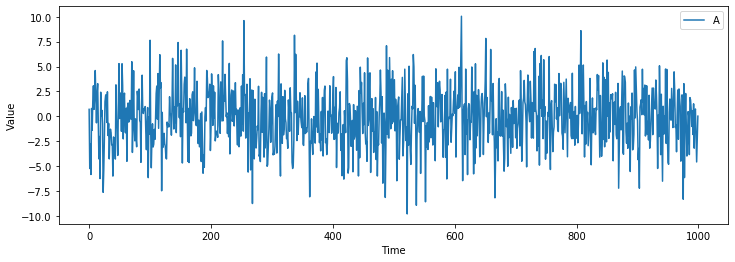

In [41]:
T = 1000

A = pd.Series(index=range(T))
A.name = 'A'
params = (0,3)  # constant mean and standard deviation

for t in range(T):
    A[t] = generate_datapoint(params)
    
print( check_stationarity(A))
print( '\nMean: ', A.mean())
print( 'STD:  ',A.std(),'\n')

plt.plot(A)
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend('A')
plt.show()

# Time Series
Today's value is dependent on yesterday value  
$
Y_t = \beta Y_{t-1} + \epsilon
$  


## beta < 1 (Stationary / Mean Reversal)

$
Y_t = \beta Y_{t-1} + \epsilon
$  
$\beta < 1 $

The smaller the beta:
- reversal is more obvious
- the more likely ADF detect as 'stationary'  
- the closer the mean to the error distribution mean
- the closer the std to the error distribution std

### Beta = 0.2

p-value =  0.0  This series is likely stationary
True

Mean:  -0.11275109573068272
STD:   2.985977912280357 



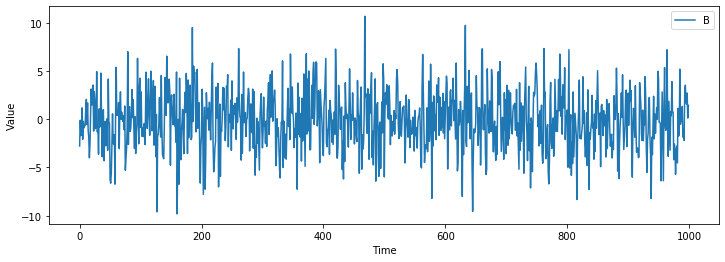

In [42]:
B = pd.Series(index=range(T))
B.name = 'Series B'

T = 1000
beta = 0.2
params = (0, 3)

for t in range(T):
    if t==0:
        B[0] = 0+generate_datapoint(params)
    else:
        B[t] = beta*B[t-1] + generate_datapoint(params)
    
print(check_stationarity(B))
print( '\nMean: ', B.mean())
print( 'STD:  ', B.std(),'\n')

plt.plot(B)
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend('B')

### Beta = 0.5

p-value =  2.023794945144463e-30  This series is likely stationary
True

Mean:  -0.09258750806044722
STD:   3.3849240380348853 



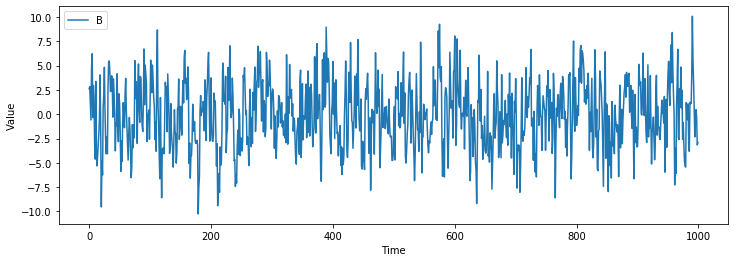

In [43]:
B = pd.Series(index=range(T))
B.name = 'Series B'

T = 1000
beta = 0.5
params = (0, 3)

for t in range(T):
    if t==0:
        B[0] = 0+generate_datapoint(params)
    else:
        B[t] = beta*B[t-1] + generate_datapoint(params)
    
print(check_stationarity(B))
print( '\nMean: ', B.mean())
print( 'STD:  ', B.std(),'\n')

plt.plot(B)
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend('B')

### Beta = 0.9

p-value =  9.691608287893732e-12  This series is likely stationary
True

Mean:  0.7765254084510804
STD:   6.733236080261994 



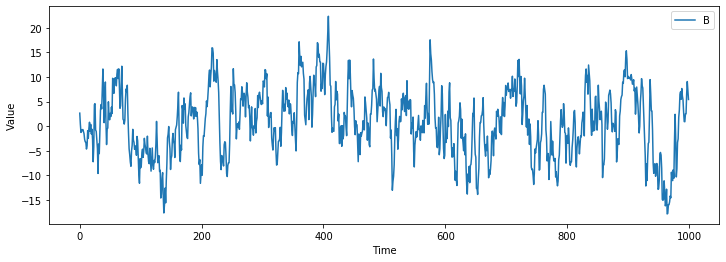

In [44]:
B = pd.Series(index=range(T))
B.name = 'Series B'

T = 1000
beta = 0.9
params = (0, 3)

for t in range(T):
    if t==0:
        B[0] = 0+generate_datapoint(params)
    else:
        B[t] = beta*B[t-1] + generate_datapoint(params)
    
print(check_stationarity(B))
print( '\nMean: ', B.mean())
print( 'STD:  ', B.std(),'\n')

plt.plot(B)
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend('B')

## beta = 1 (Random Walk)
This is totally unpredictable like a drunken man  
$
Y_t = \beta Y_{t-1} + \epsilon
$  
$\beta = 1 $

The best prediction of today's price is yesterday's price

p-value =  0.6070321107071659  The series is unlikely stationary
False

Mean:  -7.2457047597530435
STD:   34.60186765460639 



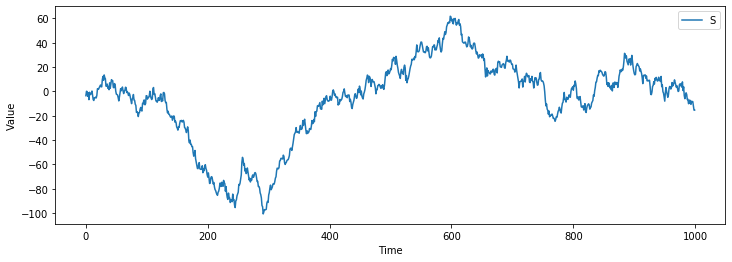

In [45]:
B = pd.Series(index=range(T))
B.name = 'Series B'

T = 1000
beta = 1
params = (0, 3)

for t in range(T):
    if t==0:
        B[0] = 0+generate_datapoint(params)
    else:
        B[t] = beta*B[t-1] + generate_datapoint(params)
    
print(check_stationarity(B))
print( '\nMean: ', B.mean())
print( 'STD:  ', B.std(),'\n')

plt.plot(B)
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend('Series B')

## Random Walk + Trend
$
Y_t = \beta Y_{t-1} + \epsilon,$  
$\beta > 1 $

This is caled 'exponential' time series, which is rare and really nothing much we can predict out of this

0   -0.087042
1    3.388812
2    5.089741
3    2.317020
4    0.389958
Name: Series B, dtype: float64
p-value =  1.0  The series is unlikely stationary
False

Mean:  14302.332244317811
STD:   28487.918282279184


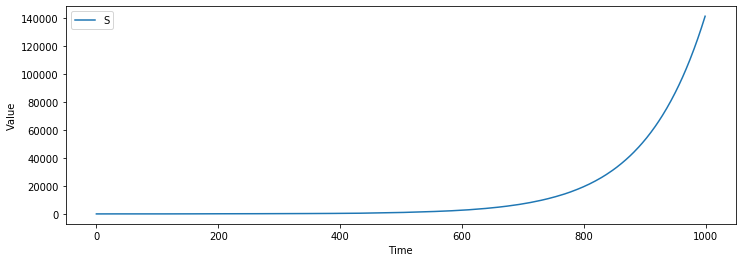

In [60]:
B = pd.Series(index=range(T))
B.name = 'Series B'

T = 1000
beta = 1.01
params = (0, 3)

for t in range(T):
    if t==0:
        B[0] = 0+generate_datapoint(params)
    else:
        B[t] = beta*B[t-1] + generate_datapoint(params)
    
print( B.head() )

plt.plot(B)
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend('Series B')

print(check_stationarity(B))
print( '\nMean: ', B.mean())
print( 'STD:  ', B.std())

## Differencing

### Random Walk Differencing
$
Y_t = Y_{t-1} +   \epsilon  
$   
$(Y_t - Y_{t-1})=  \epsilon$

p-value =  0.0  This series is likely stationary
True

Mean:  0.022721555625876362
STD:   2.81974018267319 



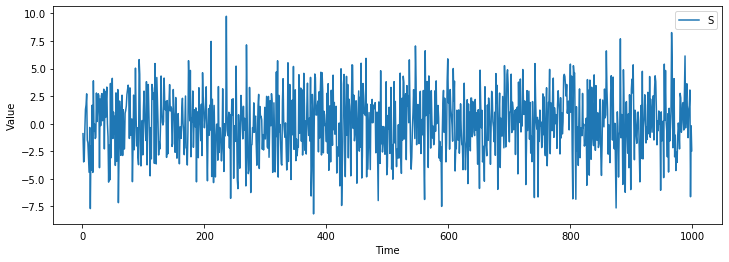

In [65]:
B = pd.Series(index=range(T))
B.name = 'Series B'

T = 1000
beta = 1
drift = 0
params = (0, 3)

for t in range(T):
    if t==0:
        B[0] = 0+generate_datapoint(params) + drift
    else:
        B[t] = beta*B[t-1] + generate_datapoint(params) + drift

B1 = B.diff()[1:]

print(check_stationarity(B1))
print( '\nMean: ', B1.mean())
print( 'STD:  ', B1.std(),'\n')

plt.plot(B1)
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend('Series B1')

p-value =  3.9271135214537763e-22  This series is likely stationary
True

Mean:  0.005262946015012126
STD:   3.1838380172029517 



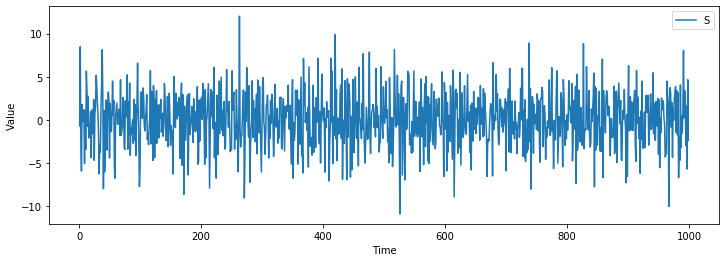

In [71]:
B = pd.Series(index=range(T))
B.name = 'Series B'

T = 1000
beta = 0.7
drift = 0
params = (0, 3)

for t in range(T):
    if t==0:
        B[0] = 0+generate_datapoint(params) + drift
    else:
        B[t] = beta*B[t-1] + generate_datapoint(params) + drift

B1 = B.diff()[1:]

print(check_stationarity(B1))
print( '\nMean: ', B1.mean())
print( 'STD:  ', B1.std(),'\n')

plt.plot(B1)
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend('Series B1')